In [2]:
import os
os.chdir('drive/MyDrive')

In [3]:
import pandas as pd
data = pd.read_csv('creditcard.csv')

In [4]:
print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## About the Dataset
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The data can be found at: [https://www.kaggle.com/mlg-ulb/creditcardfraud](https://)

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
fraud = data.loc[data['Class'] == 1]
normal = data.loc[data['Class'] == 0]

In [8]:
print(len(fraud))
print(len(normal))

492
284315


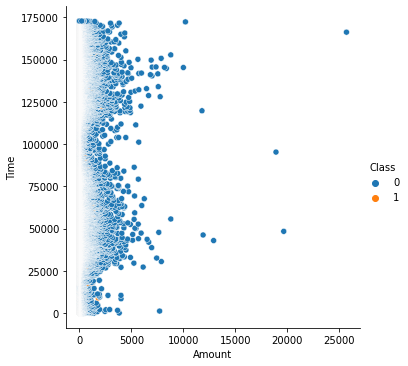

In [9]:
sns.relplot(x = 'Amount', y = 'Time',hue = 'Class', data = data)

In [10]:
print("Mean of amounts column: {}".format(data['Amount'].mean()))
print("Count of null values: {}".format(data['Amount'].isnull().sum()))
print("percentage of fraud transcations: {} %".format(100*len(data[data['Class'] == 1])/len(data['Class'])))

Mean of amounts column: 88.34961925087359
Count of null values: 0
percentage of fraud transcations: 0.1727485630620034 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


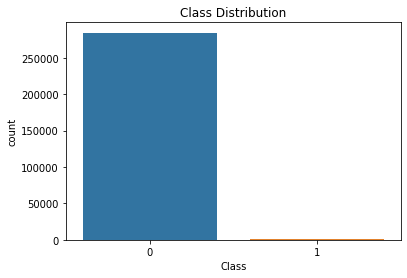

In [11]:
sns.countplot('Class', data= data)
plt.title('Class Distribution')
plt.show()

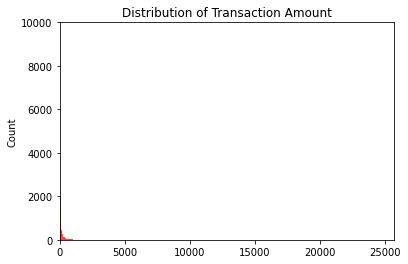

In [12]:
amt_val = data['Amount'].values
time_val = data['Time'].values


sns.histplot(data = data, x = amt_val , color = 'r',stat = 'count')
plt.title('Distribution of Transaction Amount')
plt.xlim([min(amt_val),max(amt_val)])
plt.ylim([0,10000])
plt.show()

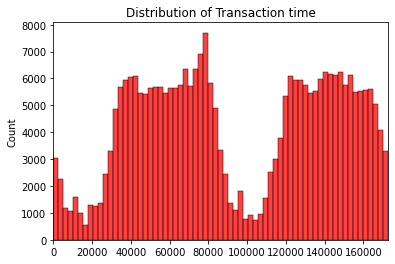

In [13]:
sns.histplot(data = data, x = time_val , color = 'r')
plt.title('Distribution of Transaction time')
plt.xlim([min(time_val),max(time_val)])
plt.show()

## Scaling and Distributing

In [14]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1,1))

In [15]:
data.head()
# the time and amount columns are scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

sss = StratifiedShuffleSplit(n_splits = 5, random_state = None)

In [17]:
for train_idx, test_idx in sss.split(X,y):
  org_Xtrain, org_Xtest = X.iloc[train_idx],X.iloc[test_idx]
  org_ytrain, org_ytest = y.iloc[train_idx],y.iloc[test_idx]  

In [18]:
# to check if training set and the testing set is distributed with the same percentage
# of +ve and -ve samples
org_Xtrain = org_Xtrain.values
org_Xtest = org_Xtest.values
org_ytrain = org_ytrain.values
org_ytest = org_ytest.values

In [19]:
train_cnts = np.unique(org_ytrain, return_counts=True)[1]
test_cnts = np.unique(org_ytest, return_counts=True)[1]

print("Ratio for training set is : {}".format(100*train_cnts[1]/(sum(train_cnts))))
print("Ratio for testing set is : {}".format(100*test_cnts[1]/(sum(test_cnts))))

Ratio for training set is : 0.17282679088348432
Ratio for testing set is : 0.17204452090867595


## Random Under Sampling

In [20]:
# creating a balanced dataset

#shuffling data
data = data.sample(frac = 1)

fraud_trans = data.loc[data['Class'] == 1]
non_fraud_trans = data.loc[data['Class'] == 0][:fraud_trans.shape[0]]

df = pd.concat([fraud_trans, non_fraud_trans])

df = df.sample(frac = 1)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
213116,0.639399,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,-4.250717,4.182162,-4.563675,1.182503,-6.964972,1.115340,-4.997332,-6.419539,-1.183593,3.569733,2.109403,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,-0.191434,1
76689,-0.328845,0.894047,-0.088961,0.816240,1.471662,-0.848833,-0.960875,0.194649,-0.236176,-0.062260,-0.065993,0.250945,0.897485,0.951858,0.097327,0.973355,0.185295,-0.407139,-0.355453,-0.722835,0.204394,0.055551,-0.111830,-0.039957,0.933830,0.319871,-0.530666,0.013312,0.064450,1.788584,0
121245,-0.100671,-0.939581,1.232830,-1.042020,-1.549936,2.282419,3.017251,-0.199861,1.320181,-0.223912,-0.385472,-0.229380,-0.095763,-0.079638,-0.090874,0.591454,1.103890,-0.639760,0.246173,-0.544901,0.095551,-0.268864,-0.999398,0.071478,0.921859,-0.183544,-0.096784,0.116686,0.084175,-0.257668,0
188475,0.508676,-1.657603,1.155839,-3.023358,-0.427548,0.930045,-0.238899,1.393751,0.356597,-0.434312,0.103558,-0.603149,0.636407,0.287793,1.109098,-0.136642,-1.568290,0.773066,-1.978225,-1.389997,-0.650628,0.585267,2.076620,0.179602,-0.909889,-1.381740,0.372593,-0.765798,-0.247672,0.851114,0
6971,-0.888497,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,-1.987773,4.690396,-6.998042,1.454012,-3.738023,0.317742,-2.013543,-5.136135,-1.183822,1.663394,-3.042626,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,24.979809,1


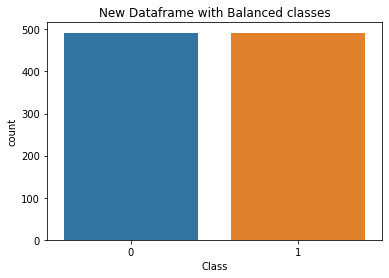

In [21]:
# check if the new dataframe df is equally distributed or not
sns.countplot(data = df,x = 'Class')
plt.title("New Dataframe with Balanced classes")
plt.show()

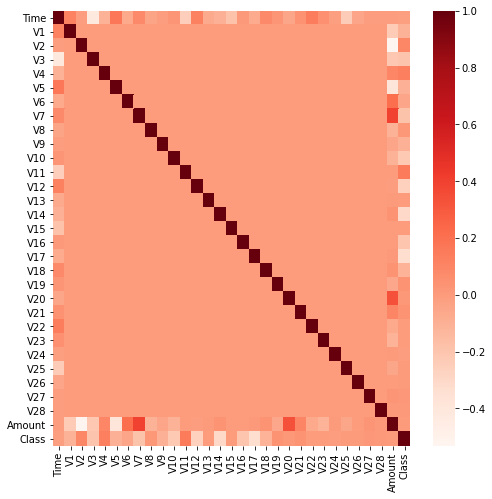

In [22]:
# feature correlation

plt.figure(figsize = (8,8))
sns.heatmap(data.corr(),cmap = 'Reds')
plt.show()

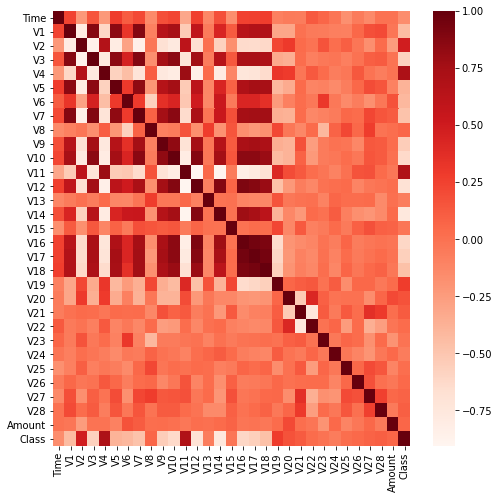

In [23]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), cmap='Reds')
plt.show()

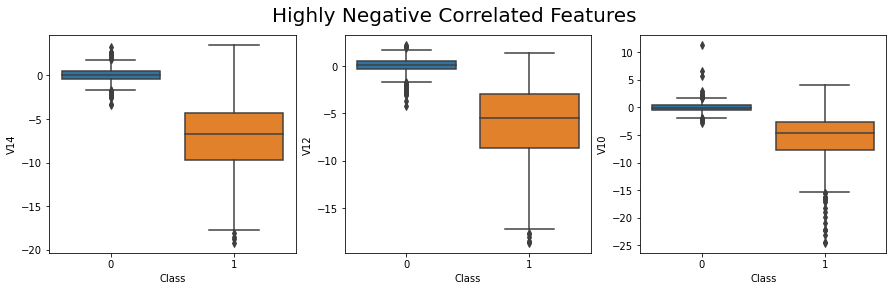

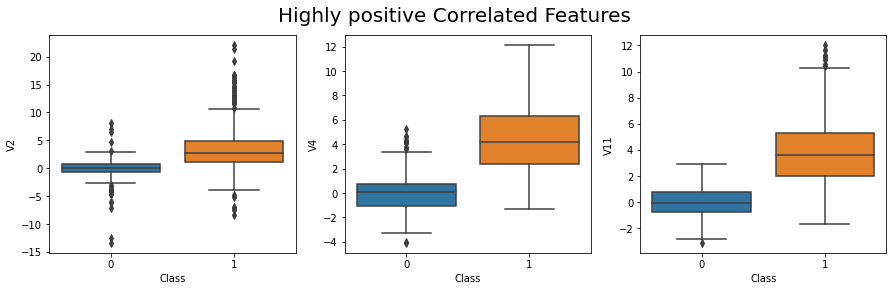

In [24]:
# features 2, 4, and 11 highly positively correlated with the class
# featutes 14, 12, 10 are highly negatively correlated with the class

# checking for outliers using Box plot
# negatively correlated
fig,axes = plt.subplots(1,3, figsize = (15,4))
l = ["V14","V12", "V10"]
for i,j in enumerate(l):
  plt.suptitle("Highly Negative Correlated Features", fontsize = "20")
  sns.boxplot(ax = axes[i],data = df,x ="Class", y = df[j])

# positively correlated features
ldash = ['V2','V4','V11']
fig,axes = plt.subplots(1,3,figsize = (15,4))
fig.suptitle("Highly positive Correlated Features", fontsize = "20")
for i,j in enumerate(ldash):
  #plt.suptitle("Highly positive Correlated Features", fontsize = "20")
  sns.boxplot(ax = axes[i],data = df,x ="Class", y = df[j])


**From the box plot we can visualize that there are many outliers present in these features. Our aim is to remove the extreme outliers from the features that are highly correlated with the target variable. This will reduces some skewness in the model**

<Figure size 360x360 with 0 Axes>

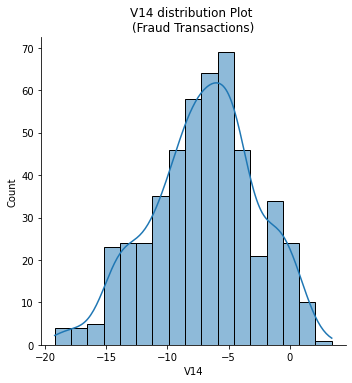

<Figure size 360x360 with 0 Axes>

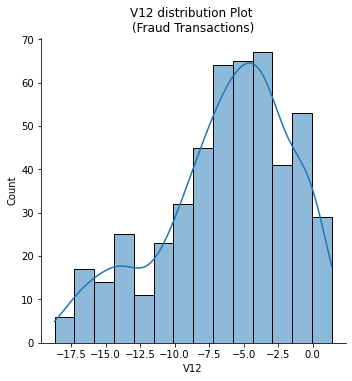

<Figure size 360x360 with 0 Axes>

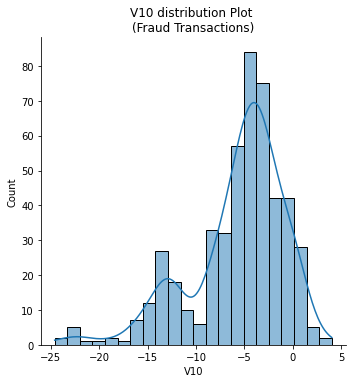

In [25]:
# ploting features with negative correlation
new_df = df[df['Class'] == 1]
plt.figure(figsize = (5,5))
sns.displot(data = new_df, 
            x = new_df['V14'], 
            kind = 'hist',
            kde = True)
plt.title('V14 distribution Plot \n(Fraud Transactions)')
plt.show()

plt.figure(figsize = (5,5))
sns.displot(data = new_df, 
          x = new_df['V12'], 
          kind = 'hist',
          kde = True)
plt.title('V12 distribution Plot \n(Fraud Transactions)')
plt.show()

plt.figure(figsize = (5,5))
sns.displot(data = new_df, 
          x = new_df['V10'], 
          kind = 'hist',
          kde = True)
plt.title('V10 distribution Plot \n(Fraud Transactions)')
plt.show()

**Using Inter Quartile range method to remove outliers form negatively correlated features**

In [26]:
# removing outliers from feature V14 with fraud transactions
v14_fraud = df[df['Class'] == 1]['V14'].values
qtr_25 = np.percentile(v14_fraud, 25)
qtr_75 = np.percentile(v14_fraud, 75)
iqr = 1.5*(qtr_75 - qtr_25)

outliers_14 = [ x for x in v14_fraud if x < (qtr_25 - iqr) or x > (qtr_75 + iqr)]
print("Number of outliers removed: {}".format(len(outliers_14)))
df = df.drop(df[(df['V14']>qtr_75 + iqr) | (df['V14']<qtr_25-iqr)].index)


# removing outliers from feature V12 with fraud transactions
v12_fraud = df[df['Class'] == 1]['V12'].values
qtr_25 = np.percentile(v14_fraud, 25)
qtr_75 = np.percentile(v14_fraud, 75)
iqr = 1.5*(qtr_75 - qtr_25)

outliers_12 = [ x for x in v12_fraud if x < (qtr_25 - iqr) or x > (qtr_75 + iqr)]
print("Number of outliers removed: {}".format(len(outliers_12)))
df = df.drop(df[(df['V12']>qtr_75 + iqr) | (df['V12']<qtr_25-iqr)].index)

# removing outliers from feature V10 with fraud transactions
v10_fraud = df[df['Class'] == 1]['V10'].values
qtr_25 = np.percentile(v14_fraud, 25)
qtr_75 = np.percentile(v14_fraud, 75)
iqr = 1.5*(qtr_75 - qtr_25)

outliers_10 = [ x for x in v10_fraud if x < (qtr_25 - iqr) or x > (qtr_75 + iqr)]
print("Number of outliers removed: {}".format(len(outliers_10)))
df = df.drop(df[(df['V10']>qtr_75 + iqr) | (df['V10']<qtr_25-iqr)].index)

print("final shape of dataset: {}".format(df.shape))

Number of outliers removed: 4
Number of outliers removed: 4
Number of outliers removed: 12
final shape of dataset: (961, 31)


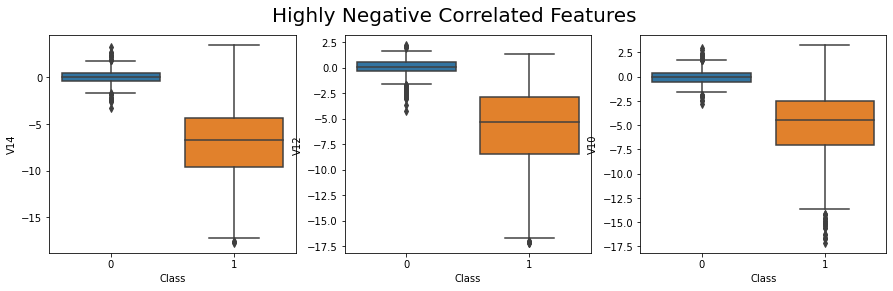

In [27]:
# negatively correlated features with fewer outliers
fig,axes = plt.subplots(1,3, figsize = (15,4))
l = ["V14","V12", "V10"]
for i,j in enumerate(l):
  plt.suptitle("Highly Negative Correlated Features", fontsize = "20")
  sns.boxplot(ax = axes[i],data = df,x ="Class", y = df[j])

In [28]:
df.shape

(961, 31)

## Dimensionality Reduction and Clustering

In [29]:
from sklearn.decomposition import PCA, TruncatedSVD

X = df.iloc[:, :-1]
y = df.iloc[:,-1]

# PCA implementation
temp_pca = PCA(n_components = 2, random_state = 42).fit_transform(X.values)

#Truncated SVD
temp_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)

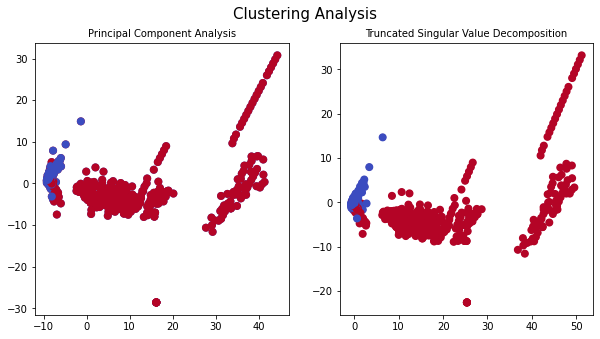

In [30]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
fig.suptitle("Clustering Analysis", fontsize = 15)

axes[0].scatter(temp_pca[:,0], temp_pca[:,1], 
                c = (y == 0), cmap = "coolwarm", 
                label = "No Fraud", linewidths = 2)
axes[0].scatter(temp_pca[:,0], temp_pca[:,1], 
                c = (y == 1), cmap = "coolwarm", 
                label = "Fraud", linewidths = 2)
axes[0].set_title("Principal Component Analysis", fontsize = 10)

axes[1].scatter(temp_svd[:,0], temp_svd[:,1], 
                c = (y == 0), cmap = "coolwarm", 
                label = "No Fraud", linewidths = 1,)
axes[1].scatter(temp_svd[:,0], temp_svd[:,1], 
                c = (y == 1), cmap = "coolwarm", 
                label = "Fraud", linewidths = 2)
axes[1].set_title("Truncated Singular Value Decomposition", fontsize = 10)

plt.show()

## Building Predictive Models

In [31]:
print(X.shape)
print(y.shape)

(961, 30)
(961,)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [33]:
x_train,x_test,y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [34]:
classifiers = {
    "LogisticsRegression": LogisticRegression(),
    "KNearest":KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for key, classifier in classifiers.items():
  classifier.fit(x_train,y_train)
  training_score = cross_val_score(classifier, x_train,y_train)
  testing_score = cross_val_score(classifier, x_test, y_test)

  print("Classifier: " ,key)
  print("Accuracy score on training set: {}".format(round(training_score.mean(),4)))
  print("Accuracy score on test set: {}".format(round(testing_score.mean(),4)))
  print("-- "*10)

Classifier:  LogisticsRegression
Accuracy score on training set: 0.9514
Accuracy score on test set: 0.892
-- -- -- -- -- -- -- -- -- -- 
Classifier:  KNearest
Accuracy score on training set: 0.9375
Accuracy score on test set: 0.9005
-- -- -- -- -- -- -- -- -- -- 
Classifier:  Support Vector Classifier
Accuracy score on training set: 0.9375
Accuracy score on test set: 0.9005
-- -- -- -- -- -- -- -- -- -- 
Classifier:  Decision Tree Classifier
Accuracy score on training set: 0.8903
Accuracy score on test set: 0.9003
-- -- -- -- -- -- -- -- -- -- 


### Finding optimal Parameters using Grid search 

In [ ]:
from sklearn.model_selection import GridSearchCV

# logistics regression hyper parameters
log_reg_hyp = {"penalty":['none','l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'solver':['liblinear', 'lbfgs']}

grid_log_reg = GridSearchCV(LogisticRegression(max_iter = 500), log_reg_hyp)
grid_log_reg.fit(x_train,y_train)
log_reg_best_est = grid_log_reg.best_estimator_

# k nearest hyper params
k_params = {"n_neighbors":list(range(2,5)), "algorithm":['auto','ball_tree','kd_tree','brute']}
grid_knear = GridSearchCV(KNeighborsClassifier(), k_params)
grid_knear.fit(x_train,y_train)
knear_best_est = grid_knear.best_estimator_

In [36]:
# SVC hyper params
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train,y_train)
svc_best_est = grid_svc.best_estimator_

# Decision Tree params
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)
tree_clf_best_est = grid_tree.best_estimator_

In [37]:
best_estimator = {'logistic regression':log_reg_best_est,'k Nearest Neighbor':knear_best_est,
                  'SVC':svc_best_est, 'Decision Tree':tree_clf_best_est}
for key, value in best_estimator.items():
  training_score = cross_val_score(value, x_train, y_train)
  testing_score = cross_val_score(value, x_test, y_test)
  print("Classifier: ", key)
  print("Accuracy score on training set: {}".format(round(training_score.mean(),4)))
  print("Accuracy score on test set: {}".format(round(testing_score.mean(),4)))
  print("-- "*10)

Classifier:  logistic regression
Accuracy score on training set: 0.9528
Accuracy score on test set: 0.9003
-- -- -- -- -- -- -- -- -- -- 
Classifier:  k Nearest Neighbor
Accuracy score on training set: 0.9417
Accuracy score on test set: 0.9088
-- -- -- -- -- -- -- -- -- -- 
Classifier:  SVC
Accuracy score on training set: 0.9486
Accuracy score on test set: 0.8878
-- -- -- -- -- -- -- -- -- -- 
Classifier:  Decision Tree
Accuracy score on training set: 0.9278
Accuracy score on test set: 0.9252
-- -- -- -- -- -- -- -- -- -- 


In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg_best_est, x_train,y_train, cv = 5)
knears_pred = cross_val_predict(knear_best_est, x_train,y_train, cv = 5)
svc_pred = cross_val_predict(svc_best_est, x_train,y_train, cv = 5)
tree_pred = cross_val_predict(tree_clf_best_est, x_train,y_train, cv = 5)

print("Logistic Regression ROC accuracy score: {}".format(roc_auc_score(y_train,log_reg_pred)))
print("K Nearest Neighbors ROC accuracy score: {}".format(roc_auc_score(y_train,knears_pred)))
print("SVC ROC accuracy score: {}".format(roc_auc_score(y_train,svc_pred)))
print("Decision Tree ROC accuracy score: {}".format(roc_auc_score(y_train,tree_pred)))

Logistic Regression ROC accuracy score: 0.9519836855765665
K Nearest Neighbors ROC accuracy score: 0.9406748238783835
SVC ROC accuracy score: 0.9480441230997404
Decision Tree ROC accuracy score: 0.9266777901371896


In [42]:
from sklearn.metrics import classification_report
print(classification_report(log_reg_pred, y_train))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       388
           1       0.93      0.97      0.95       332

    accuracy                           0.95       720
   macro avg       0.95      0.95      0.95       720
weighted avg       0.95      0.95      0.95       720



In [43]:
temp = log_reg_best_est.predict(x_test)
print(classification_report(temp,y_test))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       129
           1       0.87      0.96      0.92       112

    accuracy                           0.92       241
   macro avg       0.92      0.92      0.92       241
weighted avg       0.92      0.92      0.92       241



## Undersampling